In [9]:
# index.py can be used to propagate objects after simulation through fields in main.py
# Available features include weighting of particles and masking of regions

# Include file imports
import sys
import time
import importlib
import numpy as np
import include.plot2DTracks as plot2D
import include.plot3DTracks as plot3D
import include.showQuickEvolution as showEvol_Q
import include.showFullEvolution as showEvol_F
import include.makeFullAnimation as makeFullAni
import include.viewProbe as viewProbe
import include.writeFullEvolData as writeHist
import include.weighting_masks_function as weightmaskFunc
import include.plotWeights as plotWeights
import multiprocessing as mp
import include.movieWriter as movieWriter
import tqdm
import math
import scipy.stats as stats
import scipy.integrate as integrate
import numpy as np
import matplotlib.colors as col
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
import pdb
%matplotlib inline

# Be sure to change .npz file name location from main.py output!

# Weighting Options (Only applicable for showFullEvolution plot):
useWeights_x = True                 # Use weights in x-direction
useWeights_y = True                 # Use weights in y-direction
singleLayerBeam = False             # Use beam with thickness xden=1 in x-direction

skipWeightingCalc = False            # Skip weighting calculation and use imported pre-calculated weights
saveWeights = True                 # Save weights to .npz file (Remember to move to ./data directory!)

# Masking Options:
useMasks_xi = False                 # Use masks in xi-direction (Vertical; done during weighting)
useMasks_y = False                  # Use masks in y-direction (Horizontal; done during weighting)

# Plotting Scripts
plot2DTracks = False                 # View 2D projections of trajectories
showQuickEvolution = False           # View evolution of probe after leaving plasma at inputted x_s in scatter plots # Use for low density probes
showFullEvolution = False             # View full evolution of probe at hardcoded locations in colored histograms # Use for high density probes
makeFullAnimation = True
writeHistData = False
plotWeightsy = False                  # Plot w_x vs xi
plotWeightsx = False                  # Plot w_y vs y

In [10]:
# Load data from npz file export from main.py
data = np.load('./data/' + '36-50__xwid-1__0-002__01.npz') # Change this line as needed
x_0 = data['x_init']
y_0 = data['y_init']
xi_0 = data['xi_init']
z_0 = data['z_init']
x_f = data['x_dat']
y_f = data['y_dat']
xi_f = data['xi_dat']
z_f = data['z_dat']
px_f = data['px_dat']
py_f = data['py_dat']
pz_f = data['pz_dat']
t0 = data['t_dat']

data2 = np.load('./data/' + '36-50__xwid-1__0-002__01-weights.npz') # Change this line as needed
w = data2['w']

In [11]:
len(w)

6500000

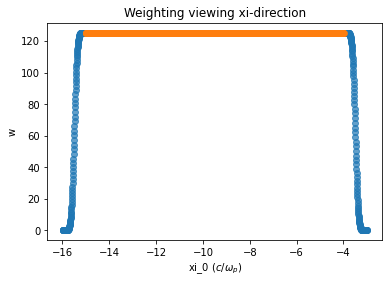

In [13]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

#ax1.set_ylim([125.3, 125.4])
ax1.set_xlabel("xi_0 ($c/\omega_p$)")
ax1.set_ylabel("w")
ax1.set_title("Weighting viewing xi-direction")
start = 0
xiden_ = 6500
ax1.plot(xi_0[xiden_*499:xiden_*500],w[xiden_*499:xiden_*500],"o",label="weighting_function",alpha=0.7,markevery=3)
ax1.plot(xi_0[xiden_*499+499:xiden_*500-499],w[xiden_*499+499:xiden_*500-499],"o",label="weighting_function",alpha=0.7,markevery=3)
fig1.savefig('w_xi-direction.jpg',dpi=600,transparent=False)

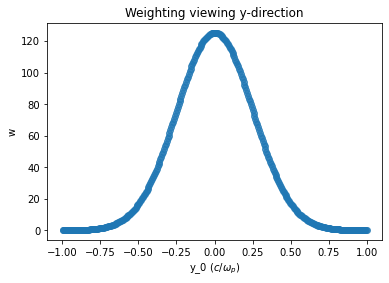

In [19]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

#ax2.set_ylim([125.3, 125.4])
ax2.set_xlabel("y_0 ($c/\omega_p$)")
ax2.set_ylabel("w")
ax2.set_title("Weighting viewing y-direction")
start = 0
xiden_ = 6500
ylayer = np.arange(0,len(y_0),xiden_)
ax2.plot(y_0[3000:len(y_0):xiden_],w[3000:len(y_0):xiden_],"o",label="weighting_function",alpha=0.7,markevery=3)
#ax2.plot(y_0[xiden_*499:xiden_*600],w[xiden_*499:xiden_*600],"o",label="weighting_function",alpha=0.7,markevery=3)
fig2.savefig('w_y-direction.jpg',dpi=600,transparent=False)


In [6]:
print(1-x_0)

[2.9 2.9 2.9 ... 2.9 2.9 2.9]
